# Tutorial on fitting with `ticktack` and `emcee`

Let's go through an example of how you would fit the original Miyake event time series from 774 AD ([Miyake et al, 2012](https://www.nature.com/articles/nature11123)) using tools from `ticktack`. First we import everything.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import ticktack
from ticktack import fitting

from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = (16.0, 8.0)

Now, we load a presaved model; `ticktack` currently has pre-saved reimplementations of the carbon box models from
['Guttler14'](https://www.sciencedirect.com/science/article/pii/S0012821X14007481?via%3Dihub#fg0030), ['Brehm21'](https://www.nature.com/articles/s41561-020-00674-0), ['Miyake17'](https://ui.adsabs.harvard.edu/abs/2017PNAS..114..881M/abstract), or ['Buntgen18'](https://www.nature.com/articles/s41467-018-06036-0#Sec12). 

In [2]:
cbm = ticktack.load_presaved_model('Guttler14', production_rate_units = 'atoms/cm^2/s')

Now we initialize a `CarbonFitter` object using this carbon box model, together with the data from Miyake et al, 2012. This will handle Bayesian inference of production rates conditioned on these data.

In [3]:
cf = fitting.CarbonFitter(cbm)
cf.load_data('miyake12.csv')
cf.prepare_function(production='miyake', fit_solar=False)

The default engine for sampling from this posterior is [emcee](https://emcee.readthedocs.io/en/stable/). We are working on implementing nested sampling and variational inference. We call `emcee` from a method of the `CarbonFitter` object like this, where params are (arrival time in years, duration in years, solar cycle phase in radians, and total radiocarbon delivered in production rate times years).

In [4]:
%%time
default_params = [775., 1./12, np.pi/2., 81./12]
sampler = cf.sampling(default_params, burnin=500, production=1000)

Running burn-in...


100%|█████████████████████████████████████████| 500/500 [01:25<00:00,  5.82it/s]


Running production...


100%|███████████████████████████████████████| 1000/1000 [02:52<00:00,  5.80it/s]

CPU times: user 4min 1s, sys: 1min 21s, total: 5min 23s
Wall time: 4min 20s


Corner plot of the posterior using [corner.py](https://corner.readthedocs.io/en/latest/):

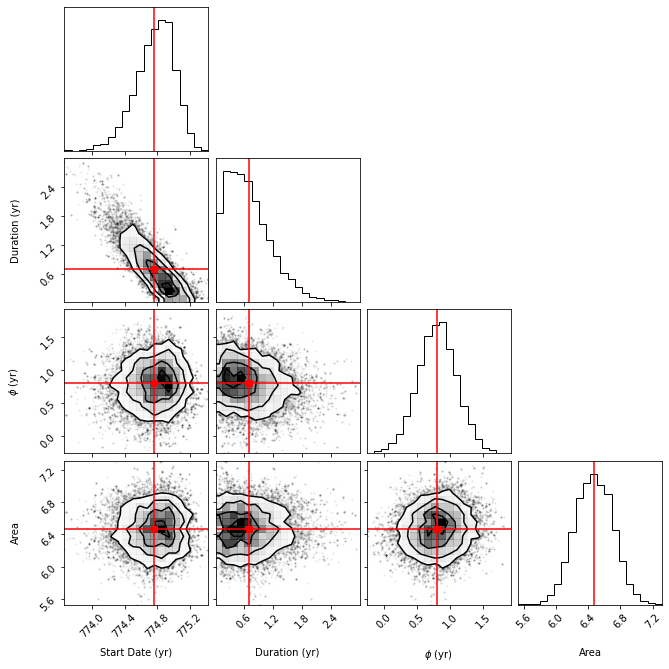

In [5]:
cf.corner_plot(sampler, labels=[r"Start Date (yr)", r"Duration (yr)", r"$\phi$ (yr)", r"Area"])

And a plot of models evaluated from samples of the posterior parameters shows a pretty good fit!

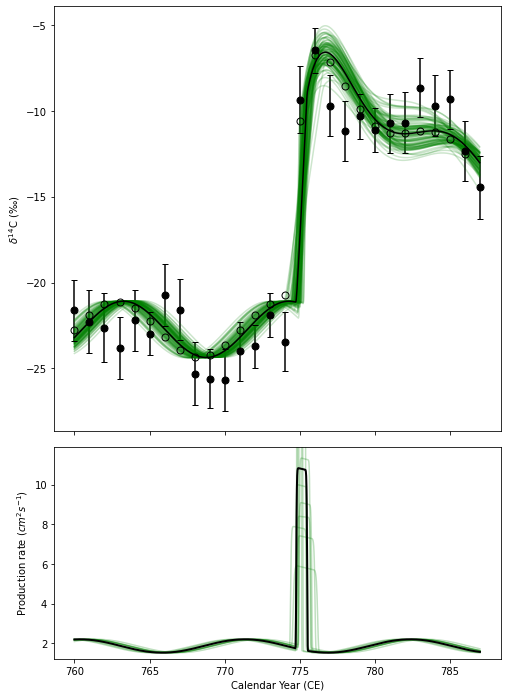

In [6]:
cf.plot_samples(sampler)